## Exploratory Data Analysis

## 피마인디언 당뇨병 데이터

* 캐글에서 제공하는 피마인디언 당뇨병 데이터 사용

### 당뇨셋 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

## 라이브러리 로드

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 데이터 로드

In [ ]:
df = pd.read_csv("data/diabetes.csv")
df.shape

(768, 9)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# info로 데이터타입, 결측치, 메모리 사용량 등의 정보 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# 결측치 보기
df_null = df.isnull()
df_null.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [ ]:
# 결측치 총 수 보기
df_null.sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

* 결측치가 없어서 위의 df_null.head() 에서 False만 나오며,

    df_null.sum() 은 0이 나온다.

In [ ]:
# 수치데이터에 대한 요약 보기

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.describe(include='number')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# 마지막의 Outcome 은 label 값임에 유의하고
# 학습과 예측에 사용할 컬럼 만들기
# feature_columns 라는 변수에 담기

feature_columns = df.columns[:-1].tolist()
feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

## 결측치 시각화

- 값을 요약해보면 최솟값이 0으로 나오는 값들 존재

  ex) 인슐린, 혈압 등의 경우 결측치 의심
  
  -> 결측치로 처리하고 시각화해보기!

In [ ]:
cols = feature_columns[1:]
cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [ ]:
# 결측치 여부를 나타내는 데이터프레임
# 0 -> NaN
df_null = df[cols].replace(0, np.nan)
df_null = df_null.isnull()
df_null.sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [ ]:
df_null.mean() * 100

Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

<AxesSubplot:>

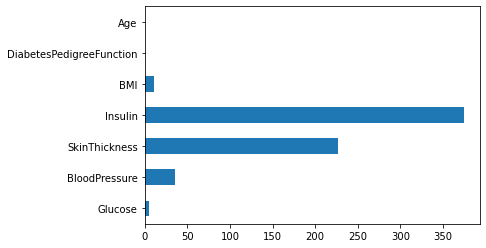

In [ ]:
# 결측치의 갯수를 막대 그래프로 시각화
df_null.sum().plot.barh()

<AxesSubplot:>

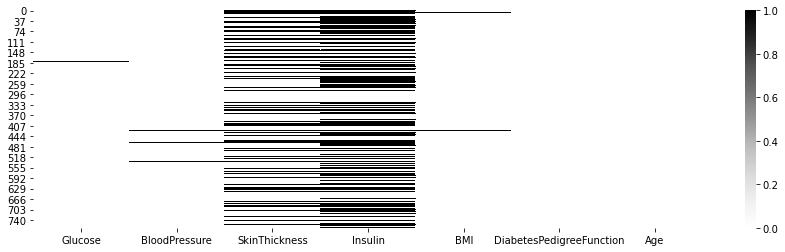

In [ ]:
# 결측치를 heatmap 으로 시각화
plt.figure(figsize=(15,4))
# cmap="Greys" 으로 인해 결측치만 흑색으로 나타남
# 결측치만 하얗게 보고싶다면 cmap="Greys_r"
sns.heatmap(df_null, cmap="Greys")

## 정답값
- = target , label

In [ ]:
# 정답값인 Outcome의 개수 확인
# 1이 발병
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
# Outcome 의 비율 확인
df["Outcome"].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [ ]:
# 다른 변수와 함께 보기
# 임신횟수와 정답값을 비교해보기
# "Pregnancies"를 groupby 로 그룹화해서 Outcome 비율 구하기

# df.groupby(["index"])["value"]

df.groupby(["Pregnancies"])["Outcome"].mean()

Pregnancies
0     0.342342
1     0.214815
2     0.184466
3     0.360000
4     0.338235
5     0.368421
6     0.320000
7     0.555556
8     0.578947
9     0.642857
10    0.416667
11    0.636364
12    0.444444
13    0.500000
14    1.000000
15    1.000000
17    1.000000
Name: Outcome, dtype: float64

In [ ]:
# 평균값과 함께 count 값 같이 보기
df.groupby(["Pregnancies"])["Outcome"].agg(["mean","count"])

,mean,count
Pregnancies,,
0,0.342342,111
1,0.214815,135
2,0.184466,103
3,0.360000,75
4,0.338235,68
5,0.368421,57
6,0.320000,50
7,0.555556,45
8,0.578947,38


In [ ]:
# 위의 결과에서 Pregnancies를 컬럼값으로 추가하고 싶은 경우, .reset_index() 이용

df_po = df.groupby(["Pregnancies"])["Outcome"].agg(["mean","count"]).reset_index()
df_po

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


<AxesSubplot:>

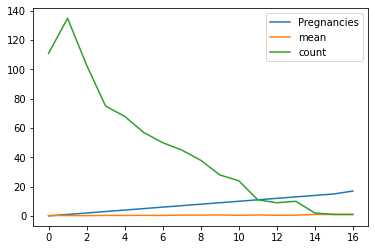

In [ ]:
# 임신횟수에 따른 당뇨병 발병 비율
df_po.plot()

<AxesSubplot:>

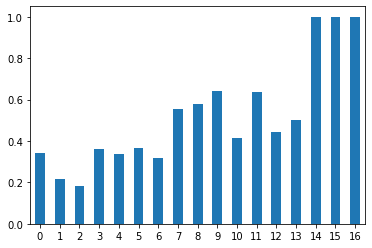

In [ ]:
df_po["mean"].plot.bar(rot=0)

## count plot

<AxesSubplot:xlabel='Outcome', ylabel='count'>

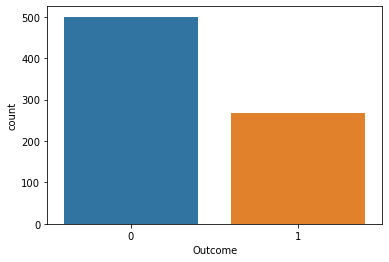

In [ ]:
# 당뇨병 발병 빈도수 비교
sns.countplot(data=df, x="Outcome")

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

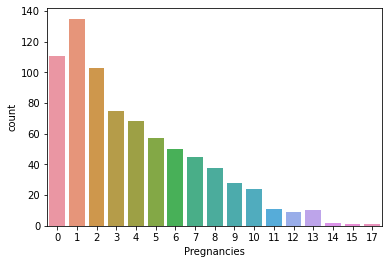

In [ ]:
# 임신횟수에 따른 당뇨병 발병 빈도수
sns.countplot(data=df, x="Pregnancies")

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

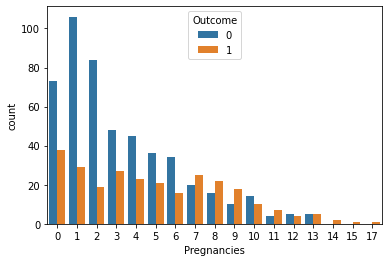

In [ ]:
sns.countplot(data=df, x="Pregnancies", hue="Outcome")

* 위의 plot에서 봤을 때 11회 이상부터는 표본이 적어 overfitting 가능성이 크다

    => 따라서 '범주화' 해서 표현하기도 함

In [ ]:
# 임신횟수의 많고 적음에 따라 Pregnancies_high 변수
df["Pregnancies_high"] = df["Pregnancies"] > 6

# 여러개의 df를 같이 보고 싶을 땐, list를 이용하기
df[["Pregnancies","Pregnancies_high"]].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


<AxesSubplot:xlabel='Pregnancies_high', ylabel='count'>

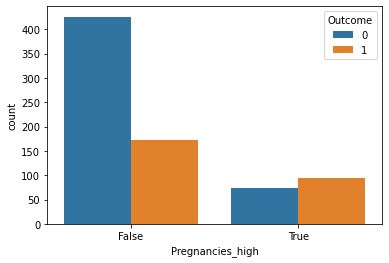

In [ ]:
# Pregnancies_high 변수의 빈도수를 countplot 으로 그리고
# Outcome 값에 따라 다른 색상으로 표현

sns.countplot(data=df, x="Pregnancies_high", hue="Outcome")

* 위처럼 연속된 수치데이터는 범주화해서 표현하기도 하는데,

    이것을 '원핫 인코딩' 이라고 한다.

## bar plot

- 기본 설정으로 시각화하면 y축에는 평균을 추정해서 그린다.

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

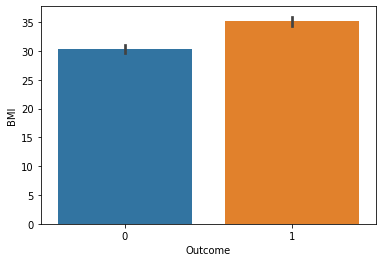

In [ ]:
# 당뇨병 발병에 따른 BMI 수치 비교

sns.barplot(data=df, x="Outcome", y="BMI")

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

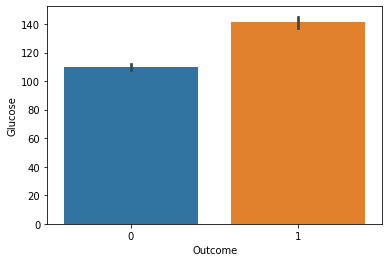

In [ ]:
# 당뇨병 발병에 따른 포도당수치 비교

sns.barplot(data=df, x="Outcome", y="Glucose")

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

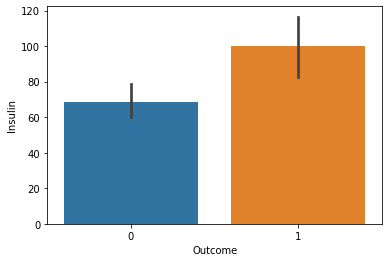

In [ ]:
# Insulin 수치가 0 이상인 관측치에 대해 당뇨병 발병 비교

sns.barplot(data=df, x="Outcome", y="Insulin")

* 위에서 검정색 막대는 신뢰구간을 의미 (파라미터: ci, 기본값 95)

<AxesSubplot:xlabel='Pregnancies', ylabel='Outcome'>

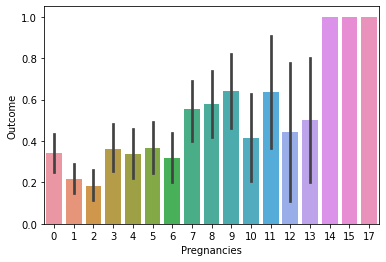

In [ ]:
# 임신횟수에 대해서 당뇨병 발병 비율 비교

sns.barplot(data=df, x="Pregnancies", y="Outcome")

<AxesSubplot:xlabel='Pregnancies', ylabel='Glucose'>

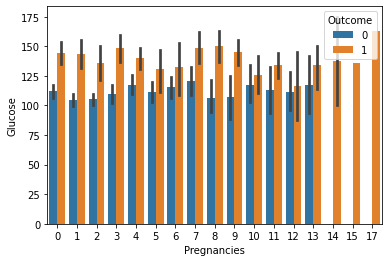

In [ ]:
# 임신횟수에 따른 포도당 수치를 당뇨병 발병여부에 따라 시각화

sns.barplot(data=df, x="Pregnancies", y="Glucose", hue="Outcome")

<AxesSubplot:xlabel='Pregnancies', ylabel='BMI'>

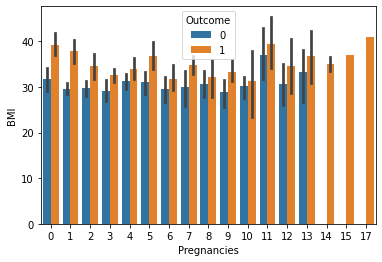

In [ ]:
# 임신횟수에 따른 BMI를 당뇨병 발병여부에 따라 시각화

sns.barplot(data=df, x="Pregnancies", y="BMI", hue="Outcome")

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

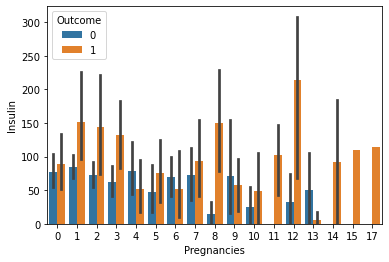

In [ ]:
# 임신횟수에 따른 인슐린 수치를 당뇨병 발병여부에 따라 시각화

sns.barplot(data=df, x="Pregnancies", y="Insulin", hue="Outcome")

## box plot

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

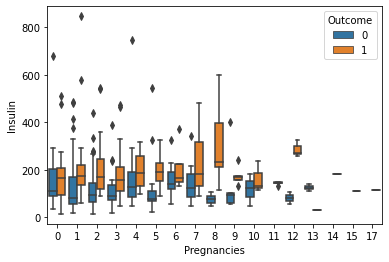

In [ ]:
# 임신횟수에 따른 인슐린 수치를 당뇨병 발병여부에 따라 시각화
# 인슐린 수치에는 결측치가 많이 때문에 0보다 큰 값에 대해서만

sns.boxplot(data=df[df["Insulin"]>0],
            x="Pregnancies", y="Insulin", hue="Outcome")

## violin plot

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

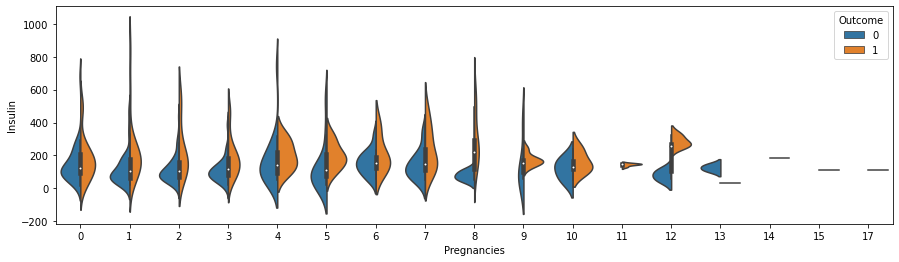

In [ ]:
# 위의 그래프를 violin plot으로 시각화
plt.figure(figsize=(15,4))
sns.violinplot(data=df[df["Insulin"]>0],
            x="Pregnancies", y="Insulin",
            hue="Outcome", split=True)

## swarm plot

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

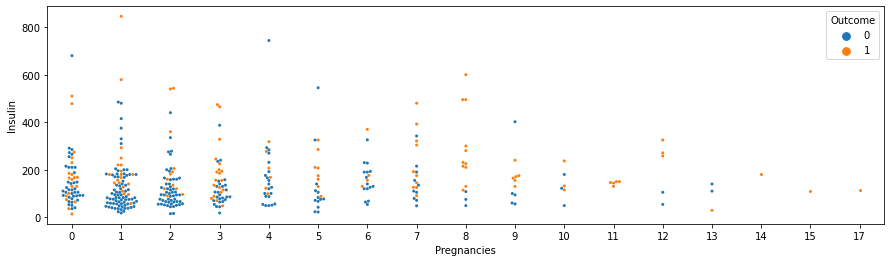

In [ ]:
# 위의 그래프를 swarm plot으로 시각화

plt.figure(figsize=(15,4))
sns.swarmplot(data=df[df["Insulin"]>0],
            x="Pregnancies", y="Insulin",
            hue="Outcome", size=3)

## dist plot

In [ ]:
df_0 = df[df["Outcome"] == 0]
df_1 = df[df["Outcome"] == 1]
df_0.shape, df_1.shape

((500, 10), (268, 10))

<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

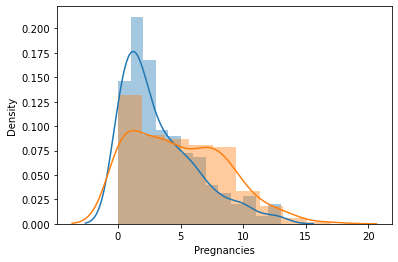

In [ ]:
# 임신횟수에 따른 당뇨병 발병 여부 시각화

#import warnings
#warnings.filterwarnings("ignore", category=FutureWarning)

sns.distplot(df_0["Pregnancies"]) # 파랑
sns.distplot(df_1["Pregnancies"]) # 주황

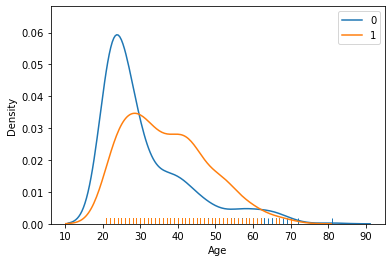

In [ ]:
# 나이에 따른 당뇨병 발병 여부 시각화

sns.distplot(df_0["Age"], hist=False, rug=True, label=0)
sns.distplot(df_1["Age"], hist=False, rug=True, label=1)

plt.legend()